# Class 02 : 함수와 미분 - 2

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import sympy

sympy.init_printing()

style_name = 'bmh' #bmh
mpl.style.use(style_name)
np.set_printoptions(precision=4, linewidth =150)

style = plt.style.library[style_name]
style_colors = [ c['color'] for c in style['axes.prop_cycle'] ]

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objs as go
from IPython.core.display import display, HTML

init_notebook_mode(connected=True)

# https://github.com/plotly/plotly.py/issues/515
# The polling here is to ensure that plotly.js has already been loaded before
# setting display alignment in order to avoid a race condition.
display(HTML(
    '<script>'
        'var waitForPlotly = setInterval( function() {'
            'if( typeof(window.Plotly) !== "undefined" ){'
                'MathJax.Hub.Config({ SVG: { font: "STIX-Web" }, displayAlign: "center" });'
                'MathJax.Hub.Queue(["setRenderer", MathJax.Hub, "SVG"]);'
                'clearInterval(waitForPlotly);'
            '}}, 250 );'
    '</script>'
))

## 미분 - 기초 이론

- 선형 회귀를 위한 가장 중요한 개념

- 머신러닝은 최적화 과정이라 할 수 있는데 최적화의 많은 알고리즘의 핵심 개념



### 다음과 같은 것들을 알아본다.

 

- 극한의 개념, 미분의 개념, 컴퓨터로 미분하는 방법



### Sympy<sup>[sympy]</sup>

> SymPy is a Python library for symbolic mathematics. It aims to become a full-featured computer algebra system (CAS) while keeping the code as simple as possible in order to be comprehensible and easily extensible. SymPy is written entirely in Python. <br/> - http://www.sympy.org

<img src="imgs/sympy.png"/>

- __극한과 미분 예제의 확인을 위해 사용__

- 극한과 미분의 복잡한 실제 계산 보다는 정확한 개념과 파이썬 코드 구현을 중심으로 리뷰

- 계산은 sympy에게 맡기면 된다.

- 사용법

```python
x = sympy.Symbol('x')
sympy.limit((x**2-1)/(x-1), x, 1)
sympy.diff(sympy.E**(2*x), x)
```


### 극한<sup>limits</sup>

- 함수에서 정의할 수 있는 함수값과는 다른 또 다른 값

- 함수 $f(x)$에서 $x$의 값이 $a$와 다른 값을 가지면서 $a$에 가까이 갈 때 $f(x)$의 값이 일정한 값 $L$에 가까워지면 

$$
\lim_{x \to a} f(x) = L
$$

- 이때 $L$을 $x \to a$일 때 함수 $f(x)$의 극한값 또는 극한이라 한다. 

- 특수한 경우 함수값과 극한값은 같고 이를 연속이라 함.

- 대부분 우리는 이런 경우를 일반적이라고 생각

- 하지만 일반적으로는 $\lim_{x \to a} f(x) \ne f(a)$

- 중요한 것은 $x$가 결코 $a$가 되지 않는다는 점, $x=a$가 된다면 그값은 함수값이 됨.



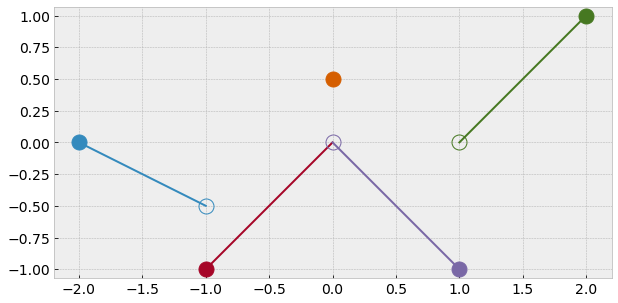

In [2]:
import matplotlib.lines as mlines

plt.rcParams["figure.figsize"] = (10,5)

x1 = np.linspace(-2, -1, 10)
x2 = np.linspace(-1, 0, 10)
x3 = np.linspace(0, 1, 10)
x4 = np.linspace(1, 2, 10)

plt.plot(x1, -(0.5*x1+1), x2, x2, x3, -x3, x4, (x4-1))

plt.plot(-2, 0, 'o', color=style_colors[0], markersize=15,)
plt.plot(-1, -0.5, 'o', color=style_colors[0], markersize=15, fillstyle='none')

plt.plot(-1, -1, 'o', color=style_colors[1], markersize=15,)
plt.plot(0, 0, 'o',   color=style_colors[2], markersize=15, fillstyle='none')
plt.plot(1, -1, 'o',   color=style_colors[2], markersize=15, )

plt.plot(1, 0, 'o',   color=style_colors[3], markersize=15, fillstyle='none')
plt.plot(2, 1, 'o',   color=style_colors[3], markersize=15, )

plt.plot(0, 0.5, 'o',   color=style_colors[4], markersize=15, )
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.axis('equal')

plt.show()

- 위 함수에서 -2 오른쪽(양의 방향)에서 -2로 계속 다가가면 $\lim_{x \to -2+}$

$$
\lim_{x \to -2+} f(x) = 0
$$

- 위 함수에서 -1 왼쪽(음의 방향)에서 -1로 계속 다가가는 경우$\lim_{x \to -1-}$와 오른쪽(양의 방향)에서 -1로 계속 다가가는 경우 $\lim_{x \to -1+}$ 각각 다른 값으로 수렴하게 된다.

$$
\lim_{x \to -1-} f(x) = -0.5 \quad \ne \quad \lim_{x \to -1+} f(x) = -1 \quad=\quad f(-1)=-1
$$

- 위 함수에서 0 왼쪽(음의 방향)에서 0으로 계속 다가가는 경우$\lim_{x \to 0-}$와 오른쪽(양의 방향)에서 0으로 계속 다가가는 경우 $\lim_{x \to 0+}$ 같은 값으로 수렴하게 된다. 단, 그 값은 함수 값과는 다르다. 

$$
\lim_{x \to 0-} f(x) = 0 \quad = \quad  \lim_{x \to 0+} f(x) = 0 \quad\ne\quad f(0) = 0.5
$$


- 위 함수에서 1 왼쪽(음의 방향)에서 1로 계속 다가가는 경우$\lim_{x \to 1-}$와 오른쪽(양의 방향)에서 1로 계속 다가가는 경우 $\lim_{x \to 1+}$ 각각 다른 값으로 수렴하게 된다.

$$
f(1)=-1 \quad = \quad \lim_{x \to 1-} f(x) = -1 \quad \ne \quad \lim_{x \to 1+} f(x) = 0 
$$


- 위 함수에서 2 왼쪽(음의 방향)에서 2로 계속 다가가면 $\lim_{x \to 2-}$

$$
\lim_{x \to 2-} f(x) = 1
$$

- 극한의 존재성 : $x \to a$일때 함수 $f(x)$가 $L$로 수렴하면 $x \to a+$ 일때 우극한과 $x \to a-$일때 좌극한이 모두 존재하고 그 값이 $L$로 같다. 또한 그 역도 성립

- 위 경우 $\lim_{x \to -1}f(x)$, $\lim_{x \to 1}f(x)$은 존재하지 않음.



#### 분수함수에서의 극한 

$$
f(x) = \frac{x^2 - 1}{x-1}
$$

- 위 함수에서 $x=1$근처에서 어떤일이 일어날까?

$$
\lim_{x \to 1} \frac{x^2 - 1}{x-1} = 2 \ne f(1)
$$

- $f(1)$는 정의되지 않음



f(x)         x
0  1.900000  0.900000
1  2.100000  1.100000
2  1.990000  0.990000
3  2.010000  1.010000
4  1.999000  0.999000
5  2.001000  1.001000
6  1.999999  0.999999
7  2.000001  1.000001

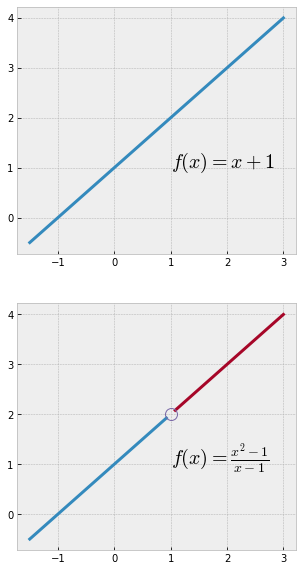

In [3]:
import pandas as pd
from IPython.display import display

plt.rcParams["figure.figsize"] = (5, 10)

x_left  = np.linspace(-1.5, 0.999999, 100)
x_right = np.linspace(1.000001, 3, 100)
x       = np.linspace(-1.5, 3, 100)

f_left  = (x_left[:-3]**2 - 1) / (x_left[:-3] -1)
f_right = (x_right[4:]**2 - 1) / (x_right[4:] -1)

f = x+1

fig = plt.figure()

ax1 = fig.add_subplot(211)
ax1.plot(x, f, lw=3)
#ax1.plot(x, x**2-1, lw=3)
#ax1.plot(x, x-1, lw=3)
ax1.text(1, 1, r"$f(x) = x+1$", fontsize=20)

ax2 = fig.add_subplot(212)
ax2.plot(x_left[:-3], f_left, x_right[4:], f_right, lw=3)
ax2.plot(1,2, 'o', markersize=12, fillstyle='none')
ax2.text(1, 1, r"$f(x) = \frac{x^2 - 1}{x-1}$", fontsize=20)

x_near = np.array([0.9, 1.1, 0.99, 1.01, 0.999, 1.001, 0.999999, 1.000001])
f_near = (x_near**2 - 1) / (x_near -1)
near = pd.DataFrame({'x':x_near, 'f(x)':f_near})
display(near) 

plt.show()

In [4]:
x = sympy.Symbol('x')

sympy.limit((x**2-1)/(x-1), x, 1)

- 삼각함수의 극한을 다루지 않지만 극한의 개념을 이해하기에 좋은 예제로 소개

$$
\lim_{x \to 0} \frac{\sin(x)}{x} = 1
$$

- $x = 0$에서 함수값이 정의되지 않지만 분자와 분모의 비가 어떻게 될까?

- $x$가 결코 0이 되지 않는다면 분자와 분모의 비를 계속 계산해 볼 수 있을 것이다!

- 그 비율이 의미하는 것은 "위 분수함수는 $x=0$ 근처에서 분자와 분모의 기울기가 거의 같아진다" 라는 것

- $\sin$ 그래프의 출발 기울기는 1이라는 의미

- 동일한 예제를 엑셀로도 확인 가능(실험 파일 : `function.xls`)

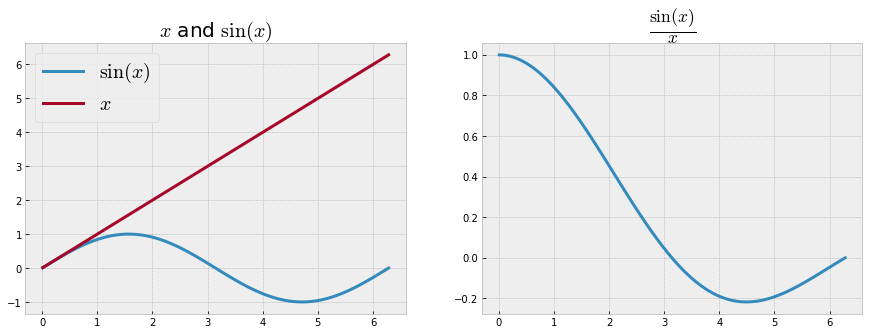

In [5]:
plt.rcParams["figure.figsize"] = (15,5)

x = np.linspace(0.01, 2*np.pi, 100)

fig = plt.figure()

ax1 = fig.add_subplot(121)
ax1.plot(x, np.sin(x), lw=3, label="$\sin(x)$")
ax1.plot(x, x, lw=3, label="$x$")
ax1.axis('tight')
ax1.set_title(r"$x$ and $\sin(x)$", fontsize=20)
ax1.legend(fontsize=20)

ax2 = fig.add_subplot(122)
ax2.plot(x, np.sin(x)/x, lw=3)
ax2.set_title(r"$\frac{\sin(x)}{x}$", fontsize=25);

plt.show()
# np.set_printoptions(precision=3, suppress=True)
# print((np.sin(x[1:]) / x[1:]).reshape(3,-1).T)

In [6]:
x = sympy.Symbol('x')

sympy.limit(sympy.sin(x)/x, x, 0)

### 미분<sup>differentiation</sup>

#### 평균변화율 

- $x$의 증분 $\Delta x$에 대한 $y$의 증분 $\Delta y$의 비율

$$
\frac{\Delta y}{\Delta x} = \frac{f(b)-f(a)}{b-a} = \frac{f(a+\Delta x)-f(a)}{\Delta x}
$$

- 두 점사이의 곡선의 형태는 평균변화율에 영향을 미치지 않음.

- 좀 더 자세한 정보를 위해 두 점사이의 간격을 좁힐 필요가 있음.

- 실제 그림에서 언덕의 가파른 정도는 중간 지점 이후부터 평균 기울기보다 훨씬 가파르다.

- a-b의 간격을 충분히 가깝게 하여 한 순간으로 만들면 가장 자세한 정보를 얻을 수 있을 것이다.


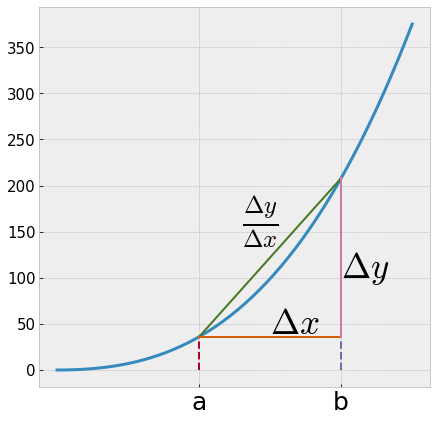

In [7]:
plt.rcParams["figure.figsize"] = (7,7)

x = np.linspace(0,5)

def f(x):
    return 2*x**3 + 5*x**2

a , b = 2,4 

plt.plot(x, f(x), lw=3)
plt.plot( (a,a), (0, f(a)), '--', lw=2 )
plt.plot( (b,b), (0, f(b)), '--', lw=2 )
plt.plot( (a,b), (f(a), f(b)), lw=2) #평균변화율
plt.plot( (a,b), (f(a), f(a)), lw=2) #dx
plt.plot( (b,b), (f(a), f(b)), lw=2) #dy

plt.text(3, 40, r'$\Delta x$', color='black', fontdict={ 'size': 35, })
plt.text(4, 100, r'$\Delta y$', color='black', fontdict={ 'size': 35, })
plt.text(2.6, 150, r'$\frac{\Delta y}{\Delta x}$', color='black', fontdict={ 'size': 35, })
plt.xticks( [a, b], ['a', 'b'] );
plt.xticks(fontsize=25)
plt.yticks(fontsize=15)

plt.show()

#### 가장 자세한 정보를 얻기 위해......

<table><tr>
<td><img src="imgs/line-grad.png"/></td>
<td><img src="imgs/curve-grad.png"/></td>
</table>



- 직선인 경우 : 어느 지점이나 경사가 똑같다. 
    - 구간을 좁힌 정보나 구간을 넓힌 평균 정보나 정보가 똑같다.

- 곡선인 경우 : 모든 지점에서 경사의 가파른 정도가 다 다르다.
    - 모든 지점에서 언덕의 가파른 정도를 알고 싶다.

- 앞서 a, b의 간격을 최대한 줄여 한 순간으로 만들면 최대한 자세한 정보를 얻을 수 있다고 했는데...

- 발의 감각만으로 언덕의 가파름을 가늠해야 한다면...
- 서있는 위치에서 한 발짝도 움직이지 않고 언덕의 경사를 알 수 있을까? 
- 미분이라는 것은 순간의 경사도를 묻고 있는 것이다.

<img src="imgs/zenos-mod.png" width="300"/>
<h5 align="center">http://paradoxoftheday.com/zeno-s-paradox-of-motion-part-1/</h5>


- 순간이란 변하지 않는 것에 대해서 변화를 생각할 수 있을까?

- 위 그림은 정지해 있지만 1초 동안 아킬레스가 거북이 보다 더 많이 움직인다는 것을 알고 있다.

- 사진의 장면 조금 전과 조금 후의 그림을 상상하면서 바로 사진의 그 순간에 변화를 생각

- 따라서 바로 이 순간 아킬레스의 위지 변화율이 더 크다고 할 수 있다.
- - -
- 미분은 한 장면만 보고 위치 변화율을 예측하는 것

- 아래와 같은 사진을 보고 두 전투기의 속도변화율을 알 수 있을까?

- 아킬레스 사진과는 다르게 사진이 찍힌 순간 이외의 정보가 없기 때문에 변화'율'을 이야기할 수 없다.

- 순간의 변화율을 알기 위해 해당 순간과 아주 가까운 다른 순간과의 연관된 정보가 필요하다는 것을 알수 있다.

<img src="imgs/tumblr_ow4-mod.png" width="500"/>
<h5 align="center">https://tanks-a-lot.tumblr.com/image/165231761767</h5>


#### 미분계수(순간변화율)The Derivative at a Point

-  평균변화율의 분모를 순간에 이를 정도로 작게 만들어

$$
f'(a) = \frac{df(a)}{dx} = \color{RoyalBlue}{\lim_{\Delta x \to 0} \frac{f(a+\Delta x)-f(a)}{\Delta x}} = \color{OrangeRed}{ \lim_{x \to a} \frac{f(x)-f(a)}{x-a}}
$$

- 극한이 존재하면 이 극한값을 순간변화율 또는 미분계수라 함

- **순간변화율은 그 위치에서 언덕의 기울기 즉, 접선의 기울기로 해석 가능**

<img src="imgs/diff-ani.gif" width=380/>

- 한점에서의 양방향에서 구한 미분계수가 같아야 한다.

<img src="imgs/diff-ani-psb.gif" width=380/>

- 좌우가 다르다면 미분 불가능

<img src="imgs/diff-ani-impsb.gif" width=380/>

#### 도함수The Derivative as a Function

- 미분계수를 함수값으로 가지는 함수, 미분 가능한 함수 $y=f(x)$의 도함수는

$$
f'(x) = \frac{df(x)}{dx} = \lim_{\Delta x \to 0} \frac{f(x+\Delta x)-f(x)}{\Delta x}
$$

<img src="imgs/deriv-ani.gif"/>

#### 용어

- differentiation $\ne$ derivative

> "The process of calculating a derivative is called differentiation."

> "If $f'$ exists at a particular $x$, we say that $f$ is differentiable (has a derivative) at $x$. If $f'$ exists at every point in the domain of $f$, we call $f$ differentiable."



#### 기호<sup>[wiki:deriv]</sup>

- $y = f(x)$일 때 아래 기호는 모두 함수 $f(x)$의 $x$에 대한 미분을 나타낸다.

    - **Leibniz's notation** : $\dfrac{dy}{dx} = \dfrac{df}{dx} = \dfrac{d}{dx}f(x)$

    - **Lagrange's notation** : $f'(x)$, $ y' $
    
    - **Newton's notation** : $\dot{y}$, $\ddot{y}$ 
    
    - **Euler's notation** :  $ D_{x}y$,$ D_{x}f(x)$, $D^{2}_{x}y$
    


### 다항 함수의 미분<sup>[paul]</sup>

- 공식 

$$
f(x) = x^n , \qquad \frac{d (f(x))}{dx} = n x ^{n-1}
$$

<br/>

- 증명

$$
\begin{align}
\frac{df(x)}{dx} 
&= \lim_{h \to 0} \frac{f(x+h)-f(x)}{h} = \lim_{h \to 0} \frac{(x+h)^n -  x^n}{h} \\[5pt]
&= \lim_{h \to 0} \frac{\{(x+h) - x\}\{(x+h)^{n-1} + (x+h)^{n-2} x + \cdots + (x+h) x^{n-2} + x^{n-1}\}}{h} \\
& \because (a - b)^n = (a-b)(a^{n-1} + a^{n-2}b + a^{n-3}b^2 + \cdots +a^2b^{n-3}+ ab^{n-2} + b^{n-1}) \\[5pt]
&= \lim_{h \to 0} \{(x+h)^{n-1} + (x+h)^{n-2} x + \cdots + (x+h) x^{n-2} + x^{n-1}\} \\[5pt]
&= \underbrace{(x)^{n-1} + (x)^{n-1} + \cdots + (x)^{n-1}}_{n} \\[5pt]
&= n x^{n-1}
\end{align}
$$

- 도함수의 정의대로 미분을 구하고, 공식으로 구하기

- $ y = x^2$

- 미분의 정의를 이용하면

$$
\lim_{h \to 0} \frac{(x+h)^2 - x^2}{h} = \lim_{h \to 0} \frac{x^2 + 2hx + h^2 - x^2}{h} = \lim_{h \to 0} \frac{h(2x +h)}{h} = 2x \\[5pt]
$$

- 공식으로 하면

$$
\frac{dy}{dx} = 2x^{2-1} = 2x
$$

- sympy 이용 하면

In [8]:
x = sympy.Symbol('x')

sympy.diff(x**2, x)

### 지수 함수의 미분

$$
\begin{align}
&\frac{d (e^x)}{dx}= e^x \\[10pt]
&\frac{d (a^x)}{dx} = a^x \ln a \qquad a>0, a \ne 1
\end{align}
$$


### 로그 함수의 미분

$$
\begin{align}
&\frac{d(\ln x)}{dx} = \frac{1}{x} \qquad x >0 \\[10pt]
&\frac{d(\log_a x)}{dx} = \frac{1}{x \ln a} \qquad x >0, a>0, a \ne 1
\end{align}
$$



#### 지수, 로그 함수 미분 예제

- 도함수의 정의대로 미분을 구하고, 공식으로 구하기

- $y = e^{2x}$ 

- 미분의 정의를 이용하면

$$
\begin{align}
\frac{dy}{dx} &= \lim_{h \to 0} \frac{e^{2(x+h)} - e^{2x}}{h} = \lim_{h \to 0} \frac{e^{2x}e^{2h} - e^{2x}}{h} \\[5pt]
&= \lim_{h \to 0} \frac{e^{2x}(e^{2h} - 1)}{h} = e^{2x} \lim_{h \to 0} \frac{e^{2h} - 1}{h}\\[5pt] 
&= e^{2x} \cdot 2 \lim_{h \to 0} \frac{e^{2h} - 1}{2h} \\[5pt]
&= 2e^{2x} \quad \because \lim_{h \to 0}\frac{e^{h} - 1}{h}=1
\end{align}
$$

- 공식으로 하면(합성함수 미분을 보고 다시 봐야함)

$$
u = 2x, y = e^u \qquad \frac{dy}{dx} = \frac{dy}{du}\frac{du}{dx} = e^u \cdot 2 =2e^{2x}
$$

- sympy 이용 하면


In [9]:
x = sympy.Symbol('x')

sympy.diff(sympy.E**(2*x), x)

- $y=\ln(x+1)$

- 미분의 정의를 이용하면

$$
\begin{align}
\frac{dy}{dx} &= \lim_{h \to 0} \frac{\ln(x+1+h) - \ln(x+1)}{h} = \lim_{h \to 0} \frac{\ln\left( \frac{x+1+h}{x+1} \right)}{h} \\[5pt] 
&= \lim_{h \to 0} \frac{\ln \left(1+ \frac{h}{x+1} \right)}{h} = \lim_{h \to 0}\ln \left(1+ \frac{h}{x+1} \right)^{\frac{1}{h}} \\[5pt]
&=  \lim_{h \to 0}\ln \left[ \left(1+ \frac{h}{x+1} \right)^{\frac{x+1}{h}} \right]^\frac{1}{x+1} \\[5pt]
&= \frac{1}{x+1} \lim_{h \to 0}\ln  \left(1+ \frac{h}{x+1} \right)^{\frac{x+1}{h}} = \frac{1}{x+1} \ln  e = \frac{1}{x+1}
\end{align}
$$

- 공식으로 하면(합성함수 미분을 보고 다시 봐야함)

$$
u = x+1, y = \ln(u) \qquad \frac{dy}{dx} = \frac{dy}{du}\frac{du}{dx} = \frac{1}{u} \cdot 1 = \frac{1}{x+1}
$$

- sympy 이용 하면

In [10]:
x = sympy.Symbol('x')

sympy.diff(sympy.log(x+1), x)

### 몇가지 미분법(참고)

#### 상수 미분

$$
\frac{d c}{dx}  = 0
$$

#### 곱의 미분
$$
y = f(x)g(x), \qquad \frac{dy}{dx} = f'(x)g(x) + f(x)g'(x)
$$

- 예제 : $y = (3x^2 + x)(x^2 - x)$

$$
\begin{align}
\frac{dy}{dx} &= (3x^2 + x)'(x^2 - x) + (3x^2 + x)(x^2 - x)' \\[5pt]
&= (6x+1)(x^2 -x) + (3x^2 + x)(2x-1) \\[5pt]
&= 12x^3 - 6x^2 - 2 x
\end{align}
$$

#### 분수함수 미분
$$
y = \frac{f(x)}{g(x)}, \qquad \frac{dy}{dx} =  \frac{f'(x)g(x) - f(x)g'(x)}{\{g(x)\}^2}
$$

- 예제 : $y = \dfrac{x^2}{x+3} $

$$
\begin{align}
\frac{dy}{dx} &= \frac{(x^2)'(x+3)- x^2 (x+3)'}{(x+3)^2} \\[5pt]
&= \frac{2x(x+3) -x^2 \cdot 1}{(x+3)^2} = \frac{x^2+6x}{(x+3)^2}
\end{align}
$$

- 위의 경우도 모두 sympy로 해결 가능

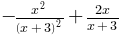

In [11]:
x = sympy.Symbol('x')

sympy.diff(x**2 / (x+3), x)

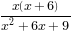

In [12]:
x = sympy.Symbol('x')

sympy.simplify(sympy.diff(x**2 / (x+3), x))

### 합성함수 미분

- $y=(2x-4)^3$을 미분하려면

In [13]:
x = sympy.Symbol('x')

sympy.expand((2*x-4)**3)

- 번거롭지만 위처럼 전개하고 각각 다항식 미분공식에 의해 미분

$$
\frac{d}{dx} (2x-4)^3 = \frac{d}{dx} 8x^3 - 48 x^2 + 96x -64 = 24x^2 - 96x + 96
$$

- 3제곱이 아니라 100제곱이면 전개해서 미분할 수 있을까?

- 다음과 같은 합성함수 공식에 의해 간단히 미분 가능

- 두 함수 $y=f(u)$, $u=g(x)$가 미분 가능할 때, 합성함수 $y = f(g(x))$의 $x$에 대한 미분

$$
\frac{d\,y}{dx} =  \frac{d\,y}{du} \frac{d\,u}{dx} 
$$


- 예제의 경우 $u=g(x)=2x-4$, $y = u^3$

$$
\frac{dy}{dx} = \color{RoyalBlue}{\frac{dy}{du}} \color{OrangeRed}{\frac{du}{dx}} = \color{RoyalBlue}{3(2x-4)^2}  \cdot \color{OrangeRed}{2}
$$

- 유도

- 두함수 $y=f(u)$, $u=g(x)$가 각각 미분 가능할 때, 합성함수 $y=f(g(x))$으 도함수는 다음처럼 구해질 수 있다.

- $x$의 함수 $u=g(x)$의 독립변수의 변화량을 $\Delta x$

- $u=g(x)$에서 $\Delta x$에 따른 $u$ 변화량을 $\Delta u$

- 최종적으로 $u$의 함수 $y=f(u)$에서 $\Delta u$에 대한 함수의 변화량을 $\Delta y$라 하자.

- 그러면 다음처럼 쓸 수 있다.

$$
\frac{\Delta y}{\Delta x} = \frac{\Delta y}{\Delta u} \frac{\Delta u}{\Delta x}
$$

- $y=f(u)$, $u=g(x)$가 각각 미분 가능하므로

$$
\lim_{\Delta u \to 0}\frac{\Delta y}{\Delta u} = \frac{dy}{du}, \qquad \lim_{\Delta x \to 0}\frac{\Delta u}{\Delta x} = \frac{du}{dx}
$$

- 한편 $\Delta u = g(x+\Delta x) - g(x)$이고 함수 $g(x)$는 연속이므로 $\Delta x \to 0 \implies \Delta u \to 0$

- 이상의 결과를 이용하면 다음처럼 합성함수 미분의 체인룰을 보일 수 있다.

$$
\begin{align}
\frac{dy}{dx} &= \lim_{\Delta x \to 0} \frac{\Delta y}{\Delta x} \\[5pt]
&= \lim_{\Delta x \to 0} \frac{\Delta y}{\Delta u} \frac{\Delta u}{\Delta x} \\[5pt]
&= \lim_{\Delta x \to 0} \frac{\Delta y}{\Delta u} \lim_{\Delta x \to 0} \frac{\Delta u}{\Delta x} \\[5pt]
&= \lim_{\Delta u \to 0} \frac{\Delta y}{\Delta u} \lim_{\Delta x \to 0} \frac{\Delta u}{\Delta x} \quad \because \Delta x \to 0 \implies \Delta u \to 0 \\[5pt]
&= \frac{dy}{du} \frac{du}{dx}
\end{align} \tag{*}
$$

- $\dfrac{dy}{du} = f'(u)= f'(g(x))$이고 $\dfrac{du}{dx}=g'(x)$이므로 (*)에 의해

- $y' = f'(g(x)) g'(x)$

In [14]:
x = sympy.Symbol('x')

sympy.diff((2*x-4)**3, x)

- 합성함수 단원에 나왔던 예제

<img src="imgs/function-comp.png"/>

- $f(x)=2x$, $g(x)=x^2 +1$ 일 때 $g \circ f(x)$의 $x$에 대한 미분

- $y=f(x)=2x$로 쓰면 $g(y)= g \circ f(x)= y^2+1$ 

$$
\frac{d g(y)}{d x} = \color{RoyalBlue}{\frac{d g(y)}{d y}} \color{OrangeRed}{ \frac{d y} {d x}} = \color{RoyalBlue}{ 2y} \cdot \color{OrangeRed}{2} = 4y = 8x
$$

In [15]:
x = sympy.Symbol('x')

sympy.diff((2*x)**2 + 1, x)

### 다변수 미분

- 2변수 이상 함수에서 하나의 변수에 대해서만 미분하는 것

- $\partial$은 편미분을 할때 쓰는 기호로 '라운드'

- 함수 $f(x,y)$에 대한 $(x_0, y_0)$에서의 $x$에 대한 편도함수의 함수값(편미분)을 다음의 극한값으로 정의

$$
\frac{\partial f}{\partial x}(x_0, y_0) = \lim_{h \to 0} \frac{f(x_0 + h, y_0)-f(x_0, y_0)}{h}
$$

- 함수 $f(x,y)$에 대한 $(x_0, y_0)$에서의 $y$에 대한 편도함수의 함수값(편미분)을 다음의 극한값으로 정의

$$
\frac{\partial f}{\partial y}(x_0, y_0) = \lim_{h \to 0} \frac{f(x_0 , y_0+ h)-f(x_0, y_0)}{h}
$$

<img src="imgs/partial.png" width="600">
<h5 align="center">https://en.wikipedia.org/wiki/Partial_derivative#/media/File:Partial_func_eg.svg  CC BY-SA 4.0</h5>

- 위 그림은 $z = f(x,y)$인 2변수 실함수를 나타낸다.

- 여기서 $y$의 값을 1로 고정하면 $x$에 대한 함수가 빨간색 선으로 나타나게 된다.

- 이 빨간선으로 나타난 함수를 $x$에 대해서 미분하는 것이 편미분이다.

- 편미분의 간단한 예 
    - (4,-2)에서 $f(x,y) = x^2 + 3xy + y -3 $ 에 대해 $\partial f / \partial x$, $\partial f / \partial y$의 값을 구하라.

$$
\frac{\partial f}{\partial x } = \frac{\partial}{\partial x} (x^2 + 3xy + y - 3) = 2x + 3y = 2
$$

$$
\frac{\partial f}{\partial y } = \frac{\partial}{\partial y} (x^2 + 3xy + y - 3) = 3x + 1 = 13
$$

- 결과와 그래프를 함께 보면서 상황을 이해

In [16]:
x = sympy.Symbol('x')
y = sympy.Symbol('y')

sympy.diff(x**2 + 3*x*y + y -3, x)

In [17]:
x = sympy.Symbol('x')
y = sympy.Symbol('y')

sympy.diff(x**2 + 3*x*y + y -3, y)

In [18]:
# https://plot.ly/python/
# https://plot.ly/python/offline/

x = y = np.arange(-4.0, 5.0, 0.05)
X, Y = np.meshgrid(x, y)

Z = X**2 + 3*X*Y + Y -3

# hover contour off
# https://community.plot.ly/t/trace-lines-appearing-on-hover/5801
data = [
    go.Surface(x=X, y=Y, z=Z, showscale=False, colorscale='Viridis',
               contours=dict(
                   x=dict(show=False, highlight=False),
                   y=dict(show=True,  highlight=False),
                   z=dict(show=True,  highlight=False),
               ),
    ),
]

layout = go.Layout(
    title='Multivariable-Scalar Fucntion',
    autosize=True,
    width=500, height=500,
    margin=dict(l=0, r=0, b=0, t=30)
)

fig = go.Figure(data=data, layout=layout)
iplot(fig)

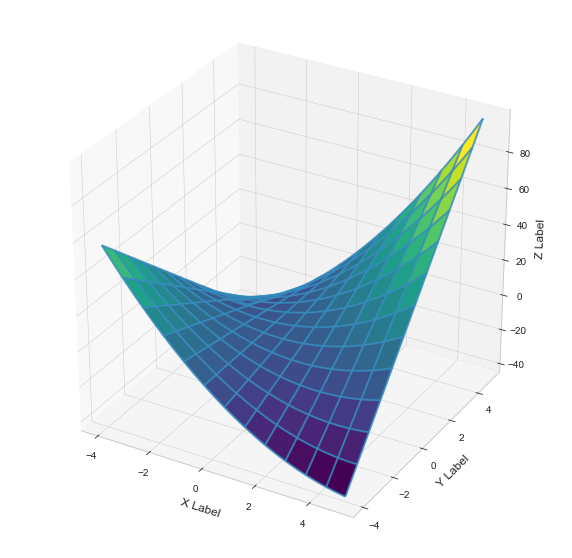

In [19]:
from mpl_toolkits.mplot3d import Axes3D
mpl.style.use('seaborn-whitegrid') # 좌표밖 배경 흰색 위해
plt.rcParams["figure.figsize"] = (10,10)

x = y = np.arange(-4.0, 5.0, 0.05)
X, Y = np.meshgrid(x, y)

Z = X**2 + 3*X*Y + Y -3

fig = plt.figure()

ax1 = fig.add_subplot(111, projection='3d')
ax1.plot_surface(X, Y, Z, rstride=15, cstride=15, cmap=plt.cm.viridis)
ax1.plot_wireframe(X, Y, Z,rstride=15, cstride=15, alpha=0.8, cmap=plt.cm.viridis)
ax1.set_xlabel('X Label')
ax1.set_ylabel('Y Label')
ax1.set_zlabel('Z Label')

plt.show()

mpl.style.use(style_name) # 다시 원래 스타일로 되돌린다.

- 위 그래프에서 $y$를 고정하고 $x$를 변화시키면 이동 경로는 아래로 볼록한 포물선 모양이 되는데 포물선의 모양이 $y$값 어디를 고정했느냐에 따라 다르고 $x$의 위치에 따라 미분계수(접선의 기울기)가 다름 $\to$ $x$에 대한 편미분은 $f(x,y)$

- 반면 $x$를 고정하고 $y$를 변화시키는 경우는 $x$값 어디를 고정했느냐에 따라서 직선의 모양이 달라지나 그 직선은 $y$값에 따라서 미분계수가 변하지 않음 $\to$ $y$에 대한 편미분은 $f(x)$



### 미분의 연쇄법칙<sup>[thomas]</sup>

- 일변수의 경우 합성함수 미분에서 본 것이 미분의 연쇄법칙, $x=g(t)$일 때 $w=f(x)$의 $t$에 대한 미분

$$
\frac{dw}{dt} = \frac{dw}{dx} \frac{dx}{dt} 
$$


<img src="imgs/chain1.png" width="250"/>

- 다변수 함수에 대해서도 동일한 규칙이 적용되며 다음과 같다. $y=f(t)$, $x=g(t)$일 때 $w=f(x,y)$의 $t$에 대한 편미분

$$
\frac{dw}{dt} =  \frac{\partial w}{\partial x}\frac{dx}{dt} + \frac{\partial w}{\partial y}\frac{dy}{dt}
$$

<img src="imgs/chain2.png" width="400"/>

- 3변수 일때 $z=f_1(t)$, $y=f_2(t)$, $x=f_3(t)$일 때 $w=f(x,y,z)$의 $t$에 대한 편미분

$$
\frac{dw}{dt} =  \frac{\partial w}{\partial x}\frac{dx}{dt} + \frac{\partial w}{\partial y}\frac{dy}{dt} + \frac{\partial w}{\partial z}\frac{dz}{dt}
$$

<img src="imgs/chain3.png" width="400"/>



### 함수의 극대, 극소

#### 함수의 최대, 최소<sup>global minimum, global maximum</sup>

>정의역 $D$에서 함수 $f$가 있을 때, 
- $D$의 점 $c$가 $D$의 모든 $x$에 대해서 $f(x) \le f(c)$이면 $f$는 최댓값<sup>absolute maximum</sup> $f(c)$를 가진다.
- $D$의 점 $c$가 $D$의 모든 $x$에 대해서 $f(x) \ge f(c)$이면 $f$는 최솟값<sup>absolute minimum</sup> $f(c)$를 가진다.


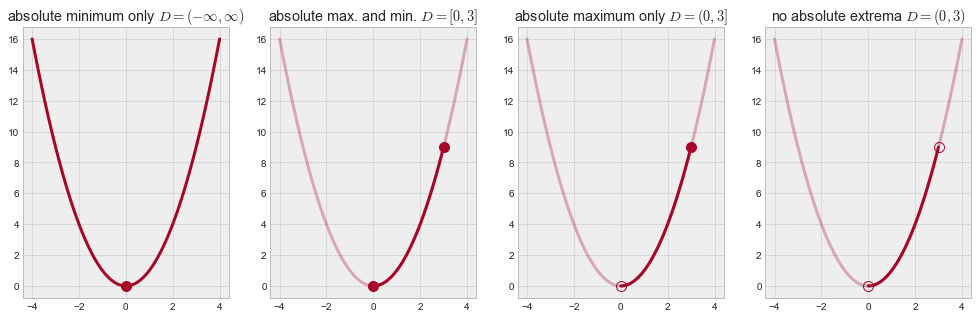

In [20]:
plt.rcParams["figure.figsize"] = (17,5)

x = np.linspace(-4, 4, 100)
x2 = np.linspace(0, 3, 100)
y = x**2
y2 = x2**2

fig = plt.figure()

ax1 = fig.add_subplot(1,4,1)
ax2 = fig.add_subplot(1,4,2)
ax3 = fig.add_subplot(1,4,3)
ax4 = fig.add_subplot(1,4,4)

ax1.plot(x, y, lw=3, color=style_colors[1])
ax1.plot(0, 0, 'o',   color=style_colors[1], markersize=10)
ax1.set_title(r'absolute minimum only $D=(-\infty, \infty)$')

ax2.plot(x, y, lw=3, color=style_colors[1], alpha=0.3)
ax2.plot(x2, y2, lw=3, color=style_colors[1])
ax2.plot(0, 0, 'o',   color=style_colors[1], markersize=10)
ax2.plot(3, 9, 'o',   color=style_colors[1], markersize=10)
ax2.set_title(r'absolute max. and min. $D=[0,3]$')

ax3.plot(x, y, lw=3, color=style_colors[1], alpha=0.3)
ax3.plot(x2, y2, lw=3, color=style_colors[1])
ax3.plot(0, 0, 'o',   color=style_colors[1], markersize=10, fillstyle='none')
ax3.plot(3, 9, 'o',   color=style_colors[1], markersize=10)
ax3.set_title(r'absolute maximum only $D=(0,3]$')

ax4.plot(x, y, lw=3, color=style_colors[1], alpha=0.3)
ax4.plot(x2, y2, lw=3, color=style_colors[1])
ax4.plot(0, 0, 'o',   color=style_colors[1], markersize=10, fillstyle='none')
ax4.plot(3, 9, 'o',   color=style_colors[1], markersize=10, fillstyle='none')
ax4.set_title(r'no absolute extrema $D=(0,3)$')

plt.show()

|함수  | 도메인 $D$    &nbsp;&nbsp;&nbsp;    | 최대 최소                                          |
|------|------|-----|
|   $y=x^2$  | $(-\infty, \infty)$ |최대값 없음<br/>$x = 0$에서 최소값 0 |
|   $y=x^2$  | $[0,3]$ | $x = 3$에서 최대값 9<br/>$x = 0$에서 최소값 0 |
|   $y=x^2$  | $(0,3]$ |$x = 3$에서 최대값 9<br/> 최소값 없음|
|   $y=x^2$  | $(0,3)$ |최대, 최소 없음 |


#### 함수의 극대, 극소<sup>local minimum, local maximum</sup>

>- 도메인 $D$ 내부의 점 $c$를 포함하는 임의의 열린 구간에서 $D$에 포함되는 모든 $x$에 대해 $f(x) \le f(c)$이면 $f(x)$는 $c$에서 극댓값을 가진다.
- 도메인 $D$ 내부의 점 $c$를 포함하는 임의의 열린 구간에서 $D$에 포함되는 모든 $x$에 대해 $f(x) \ge f(c)$이면 $f(x)$는 $c$에서 극솟댓값을 가진다.
- 극댓값과 극솟값을 통틀어 극값<sup>local extrema</sup>라 한다.
 

<img src="imgs/minmax2.png" width="700">




#### 극값과 미분계수the First Derivative theorem for Local extreme values

> 미분가능한 함수 $f(x)$가 $x=c$에서 극값을 가지고, $c$에서  $f'$가 정의되면 $f'(c)=0$

- 함수 $f(x)$가 $x=c$에서 극댓값을 가진다면 $f(c+h) \le f(c)$이므로

$$
 h < 0 \implies 0 \color{RoyalBlue}{\le}  \frac{f(c+h)-f(c)}{h}  , \quad h > 0 \implies \frac{f(c+h)-f(c)}{h} \color{OrangeRed}{\le} 0 
$$

- $f'(c)$가 정의된다 했으므로

$$
0 \color{RoyalBlue}{\le} \underbrace{ \lim_{h \to 0-} \frac{f(c+h)-f(c)}{h} = \lim_{h \to 0+} \frac{f(c+h)-f(c)}{h} }_{f'(c)} \color{OrangeRed}{\le} 0 \\[5pt]
\therefore f'(c) = 0
$$

- 예제 : $[1, 4]$에서 $f(x)=-(x-2)^2 + 10$의 최솟값과 최댓값은?

$$
f'(x) = -2(x-2)
$$
 
- 미분이 0이 되는 지점

$$
f'(2) = 0
$$

- 미분이 0이 되는 지점과 경계의 양끝점에서 함수값

$$
f(1) = 9, \quad f(2)=10, \quad f(4) = 6
$$



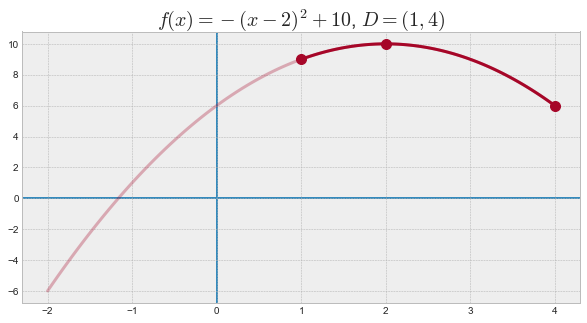

In [21]:
plt.rcParams["figure.figsize"] = (10,5)

x = np.linspace(-2, 4, 100)
x2 = np.linspace(1, 4, 100)
y = -(x-2)**2 + 10
y2 =-(x2-2)**2 + 10

plt.plot(x, y, color=style_colors[1], lw=3, alpha=0.3)
plt.plot(x2, y2, color=style_colors[1], lw=3)
plt.plot(2, 10, 'o',   color=style_colors[1], markersize=10)
plt.plot(1, 9, 'o',   color=style_colors[1], markersize=10)
plt.plot(4, 6, 'o',   color=style_colors[1], markersize=10)

plt.axvline(zorder=-1)
plt.axhline(zorder=-1)

plt.title(r'$f(x)=-(x-2)^2 + 10$, $D = (1,4)$', fontsize=20)

plt.show()

## 미분 - 실습

- 미분을 컴퓨터로 계산하기 위한 방법을 배운다.

- 심볼릭 연산
    - Sympy, Mathematica, Wolfram alpha 같은 소프트웨어로 손으로 계산한것처럼 도함수를 구할 수 있다.
    
- 코드 구현 : 도함수를 심볼릭하게 구하는 것이 아니라 특정 점에서 미분계수를 구한다.

    - 직접 미분
    - 수치 미분
    - 그래프 방식 미분

### 직접 미분

- 제목처럼 미분을 직접해서 코드로 적어 줌

- 아래와 같은 함수의 경우

$$
x^2 + 3x +4
$$

```python
def f(x):
    return x**2 + 3*x + 4

def df(x):
    return 2*x + 3
```

- 장점 : 정확한 결과, 빠른 속도

- 단점 : 미분을 해야 한다!!!


### 수치 미분<sup>[arora]</sup>

- 미분의 정의를 수치적으로 구현

- 아주 작은 독립변수의 변화 $\Delta x$로 종속변수의 변화 $\Delta y$를 실제로 계산

- 이 둘을 나누어 특점점에서의 미분 계수를 근사

- 장점 : 구현이 간단하다.

- 단점 : 다변수 함수의 경우 모든 변수에 대해 같은 계산을 반복해야하므로 변수가 많으면 매우 느리다.

- 활용 : 머신러닝에서는 주로 그래프 방식의 미분 계산이 정확한지 확인할 목적으로 사용함.

#### 전방차분법
$$
\frac{\partial \, f}{\partial \, x_i} \approx \frac{f(x_1, \cdots, \color{RoyalBlue}{x_i + \Delta x_i} , \cdots, x_n) - f(x_1, \cdots, x_i, \cdots, x_n)}{\Delta x_i}
$$

#### 후방차분법
$$
\frac{\partial \, f}{\partial \, x_i} \approx \frac{f(x_1, \cdots, x_i, \cdots, x_n)-f(x_1, \cdots, \color{RoyalBlue}{x_i - \Delta x_i} , \cdots, x_n) }{\Delta x_i}
$$

#### 중앙차분법
$$
\frac{\partial \, f}{\partial \, x_i} \approx \frac{f(x_1, \cdots, \color{RoyalBlue}{x_i+\frac{1}{2}\Delta x_i}, \cdots, x_n)-f(x_1, \cdots, \color{RoyalBlue}{x_i - \frac{1}{2} \Delta x_i} , \cdots, x_n) }{\Delta x_i}
$$

- 아래 실험코드로 중앙차분법과 전방차분법의 오차 정도를 알아 볼 수 있다.

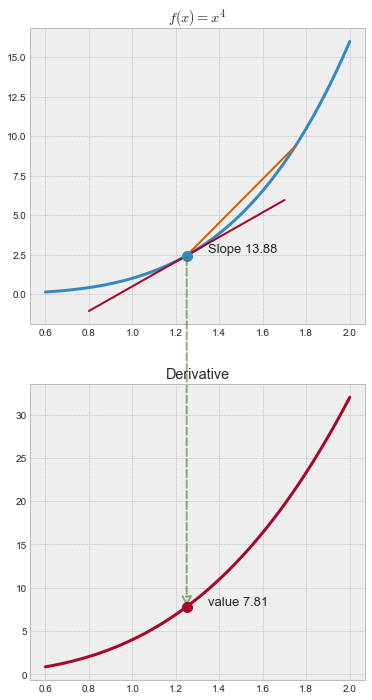

In [22]:
from matplotlib.patches import ConnectionPatch

plt.rcParams["figure.figsize"] = (6,12)

############################################################
# x^4의 해석적 미분
############################################################
def f(x) :
    return  x**4

def fdot(x):
    return 4*x**3

############################################################
# 수치미분함수
############################################################
def numer_deriv(f, x, eps=0.001, method='center') :
    """
    f : 미분할 함수, 주어진 위치에서 함수값 계산
    x : 미분계수를 구할 변수의 위치
    eps : dx
    method : 'forward', 'center'
    """
    if method=='forward' :
        diff = (f(x+eps) - f(x))/eps
    else :
        diff = (f(x+eps/2) - f(x-eps/2))/eps
    
    return diff
    
def draw_slope(pts, ax1, ax2, eps=1.0e-5, method='center', itv=0.45) :
    """
    method : 'center', 'forward'
    ivt : 기울기선 그림그리는 간격지정
    """
    
    for x in pts :
        ax1.plot(x, f(x), 'o', markersize=10, color=style_colors[0], zorder=3)
        ax2.plot(x, fdot(x), 'o', markersize=10, color=style_colors[1], zorder=3)
        
        con = ConnectionPatch(xyA=(x, fdot(x)), xyB=(x, f(x)), ls='--', coordsA="data", coordsB="data",
                      axesA=ax2, axesB=ax1, color=style_colors[3], lw=2, alpha=0.6,
                      arrowstyle="<|-", mutation_scale=20, fc="w", zorder=2)
        ax2.add_artist(con)
        
        #numerical deriv.
        diff = numer_deriv(f, x, eps, method)
        
        if method=='forward' :
            ax1.plot([x, x+eps], [f(x), f(x+eps)], lw=2, color=style_colors[4])
            
        else :
            ax1.plot([x-eps/2, x+eps/2], [f(x-eps/2), f(x+eps/2)], lw=2, color=style_colors[4])
            
        ax1.plot([x-itv, x+itv], [f(x)-fdot(x)*itv, f(x)+fdot(x)*itv], lw=2, color=style_colors[1])
        ax1.text(x + 0.1 ,f(x)+0.2, "Slope {:.2f}".format(diff), fontsize=13)
        ax2.text(x + 0.1 ,fdot(x)+0.2, "value {:.2f}".format(fdot(x)), fontsize=13)

fig = plt.figure()
ax1 = fig.add_subplot(2, 1, 1)
ax2 = fig.add_subplot(2, 1, 2)

x = np.linspace(0.6, 2, 100)
slope_points = [1.25] 

ax1.plot(x, f(x), color=style_colors[0], lw=3)
ax1.set_title(r"$f(x)=x^4$")

ax2.plot(x, fdot(x), color=style_colors[1], lw=3)
ax2.set_title(r"Derivative")

# foward, central 을 바꿔가면서 정확도를 확인해 볼 수 있다.
draw_slope(slope_points, ax1, ax2, 0.5, 'forward')

plt.show()

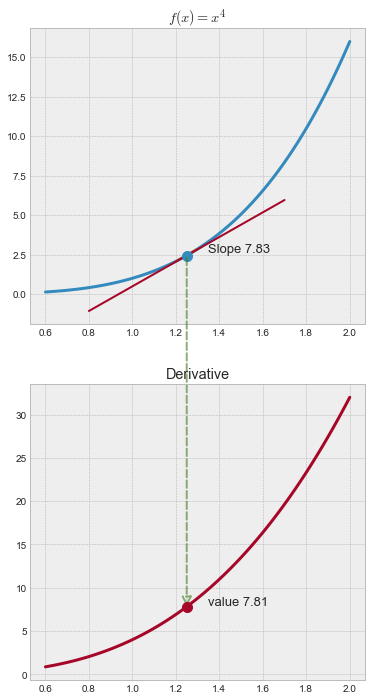

In [23]:
from matplotlib.patches import ConnectionPatch

plt.rcParams["figure.figsize"] = (6,12)

############################################################
# x^4의 해석적 미분
############################################################
def f(x) :
    return  x**4

def fdot(x):
    return 4*x**3

############################################################
# 수치미분함수
############################################################
def numer_deriv(f, x, eps=0.001, method='center') :
    """
    f : 미분할 함수, 주어진 위치에서 함수값 계산
    x : 미분계수를 구할 변수의 위치
    eps : dx
    method : 'forward', 'center'
    """
    if method=='forward' :
        diff = (f(x+eps) - f(x))/eps
    else :
        diff = (f(x+eps/2) - f(x-eps/2))/eps
    
    return diff
    
def draw_slope(pts, ax1, ax2, eps=1.0e-5, method='center', itv=0.45) :
    """
    method : 'center', 'forward'
    ivt : 기울기선 그림그리는 간격지정
    """
    
    for x in pts :
        ax1.plot(x, f(x), 'o', markersize=10, color=style_colors[0], zorder=3)
        ax2.plot(x, fdot(x), 'o', markersize=10, color=style_colors[1], zorder=3)
        
        con = ConnectionPatch(xyA=(x, fdot(x)), xyB=(x, f(x)), ls='--', coordsA="data", coordsB="data",
                      axesA=ax2, axesB=ax1, color=style_colors[3], lw=2, alpha=0.6,
                      arrowstyle="<|-", mutation_scale=20, fc="w", zorder=2)
        ax2.add_artist(con)
        
        #numerical deriv.
        diff = numer_deriv(f, x, eps, method)
        
        if method=='forward' :
            ax1.plot([x, x+eps], [f(x), f(x+eps)], lw=2, color=style_colors[4])
            
        else :
            ax1.plot([x-eps/2, x+eps/2], [f(x-eps/2), f(x+eps/2)], lw=2, color=style_colors[4])
            
        ax1.plot([x-itv, x+itv], [f(x)-fdot(x)*itv, f(x)+fdot(x)*itv], lw=2, color=style_colors[1])
        ax1.text(x + 0.1 ,f(x)+0.2, "Slope {:.2f}".format(diff), fontsize=13)
        ax2.text(x + 0.1 ,fdot(x)+0.2, "value {:.2f}".format(fdot(x)), fontsize=13)

fig = plt.figure()
ax1 = fig.add_subplot(2, 1, 1)
ax2 = fig.add_subplot(2, 1, 2)

x = np.linspace(0.6, 2, 100)
slope_points = [1.25] 

ax1.plot(x, f(x), color=style_colors[0], lw=3)
ax1.set_title(r"$f(x)=x^4$")

ax2.plot(x, fdot(x), color=style_colors[1], lw=3)
ax2.set_title(r"Derivative")

# foward, central 을 바꿔가면서 정확도를 확인해 볼 수 있다.
draw_slope(slope_points, ax1, ax2, 0.1, 'center')

plt.show()

- 다음처럼 조금 복잡한 함수를 실제 수치 미분 해보면 전방차분법과 중앙차분법의 차이를 확인할 수 있다. 

$$
f(x) = \frac{4x}{x^2 +1}
$$

- 동일한 예제를 엑셀로도 확인 가능(실험 파일 : `function.xls`)

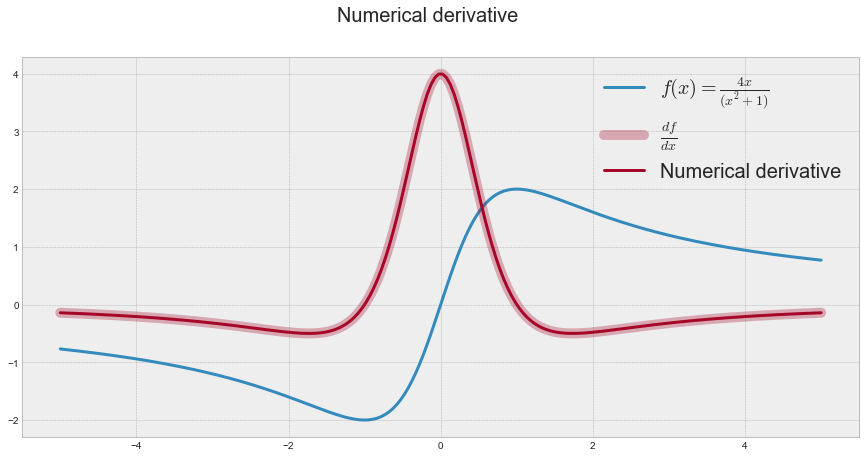

In [24]:
plt.rcParams["figure.figsize"] = (15,7)

def f(x):
    """
    실습용 함수 정의
    """
    return 4*x / (x**2  + 1)

def df_anal(x):
    """
    sympy의 결과로 얻은 도함수
    """
    return (-4*x**2 + 4)  / (x**4 + 2*x**2 + 1)

def df_numer(x):
    """
    수치적으로 도함수의 값을 계산하는 함수
    중앙차분법으로 바꿔보세요.
    """
    h = 0.1
    return (f(x+h) - f(x)) / h
    
x = np.linspace(-5, 5, 200)

plt.plot(x, f(x), lw=3, color=style_colors[0], label=r"$f(x) = \frac{4x}{(x^2  + 1)}$")
plt.plot(x, df_anal(x), lw=10, color=style_colors[1], alpha=0.3 , label=r"$\frac{df}{dx}$")
plt.plot(x, numer_deriv(f, x, eps=0.001, method='center'), color=style_colors[1], lw=3, label=r"Numerical derivative")
plt.legend(fontsize=20)

plt.suptitle("Numerical derivative", fontsize=20)
plt.show()

### 자동미분Automatic Differentiation(그래프 방식)<sup>[nocedal, Géron]</sup>

- 복잡한 함수를 작은 연산 단위로 분리하여 각각에 대해 처리

- 종류 : 포워드 모드<sup>forward mode [nocedal, Géron]</sup>, 리버스 모드<sup>reverse mode</sup>

- 포워드 모드는 방향미분<sup>directional derivative,[wiki:direc_deriv]</sup> 개념이 필요하므로 본 수업의 범위를 벗어나며 여기서는 리버스 모드만 다룸

- 리버스 모드

    - 순전파: 함수를 그래프 방식으로 나열한 후 순차적인 +, -, *, /를 적용하여 함수값을 계산

    - 역전파 : 연쇄법칙을 사용하여 미분계수를 계산

- 장점 : 복잡한 함수의 미분도 루틴의 반복으로 계산, 빠른 속도

- 단점 : 무슨 소리하는지 잘 모를 수 있다?! 구현 어려움

- 활용 : 신경망의 역전파 알고리즘

#### 자동 미분 간단 예

- 다음 함수에 있어서 자동 미분 방식으로 미분을 계산


$$
z(x,y) = xy
$$

- 각각을 그냥 손으로 미분하면 다음과 같음을 이미 알고 있다.

$$
\frac{\partial z}{\partial x} = y \quad \frac{\partial z}{\partial y} = x
$$

- $x$로 미분하면 $y$가 되고, $y$로 미분하면 $x$가 되어 미분하는 변수의 반대로 결과가 나온다.

- 위 함수를 아래처럼 노드는 연산, 화살표는 숫자의 흐름을 의미하게 그래프로 그림.

<img src="imgs/autodiff1.png" width="550">

- 위 그래프 $x=10$, $y=5$를 대입하고 계산하면 $z=50$, 이 과정을 순전파라고 함

- 위 손미분에서 결과가 반대로 나온다는 사실로 인해 $x=10$, $y=5$에서의 각 편도함수의 값은 $\dfrac{\partial z}{\partial x}= 5$, $\dfrac{\partial z}{\partial y}= 10$이고 이는 아무런 계산이 필요없이 그냥 입력의 위치만 바꿔주면 됨


- 이제 아무것도 안하는 노드 하나를 마지막에 붙이고 통과 시키고 그결과를 $f$라고 하면 $f = z$가 됨

- 이 상태에서 최종 함수 $f$를 $x$로 미분하면 함수가 변한것이 아무것도 없기 때문에 결과는 여전히 $\dfrac{\partial f}{\partial x}= 5$

<img src="imgs/autodiff2.png" width="780">

- 하지만 $f$는 $x$의 함수가 아니라 $z$의 함수이므로 다음과 같은 결과로 미분

$$
\frac{\partial f}{\partial x} = \frac{\partial f}{\partial z} \frac{\partial z}{\partial x}  
$$

- $\dfrac{\partial z}{\partial x}  $은 좀 전과 같고 새롭게 추가된 $\frac{\partial f}{\partial z}$만 계산해서 곱해주면 미분 완성

- 이 예에서는 $\frac{\partial f}{\partial z}=1$이므로 최종 결과는 변하지 않는다.

- 따라서 아래와 같은 루틴을 반복하는 것으로 복잡한 전체 미분을 완성할 수 있음.

> 최소 함수 단위로 쪼갠 다음 각각에 대해서 미분을 계산하고 이를 다 곱해준다.



#### 자동 미분 예제 1 - 순전파forward propagation

- 다음 함수는 더 작은 함수의 함성함수로 생각해 볼 수 있다.

$$
f(x) = x^2 + 3x + 4
$$

$$
a(x) = x^2, \quad b(x) = 2x \quad c(a,b) = a + b
$$

- 위 처럼 작은 단위의 함수를 정의하면 주어진 함수는 

$$
f(x) = c(a(x), b(x)) + 4
$$

- 함수값을 계산하기 위해 다음 절차를 따른다.
    - $x$를 $a(x)$에 대입하여 값을 구한다. 이를 $a$로 둔다.
    - $x$를 $b(x)$에 대입하여 값을 구한다. 이를 $b$로 둔다.
    - $a$와 $b$를 $c(a,b)$에 대입하여 값을 구한다. 이를 $c$로 둔다.
    - 마지막으로 $c$와 4를 더하여 함수값을 계산한다.

- 아래 계산 절차가 그림으로 설명

<img src="imgs/forward-prop.png" width="800"/>


#### 자동 미분 예제 1 - 역전파back propagation

- 앞선 연쇄법칙을 적용하면 입력노드로 $x$가 3개 있으므로 각 노드에 대해 체인룰을 적용해서 결과를 모두 더한다. 


$$
\frac{dy(x)}{dx} = \frac{dy}{dy}\frac{dy}{dc}\frac{dc}{da}\frac{da}{dx} + \frac{dy}{dy}\frac{dy}{dc}\frac{dc}{da}\frac{da}{dx} + \frac{dy}{dy}\frac{dy}{dc}\frac{dc}{db}\frac{db}{dx}
$$

- 아래는 각 $x$가 $y(x)$에 미치는 영향을 따라가는 경로를 표시한 것

- 여기서는 $x$가 모두 같은 변수 이므로 조금 이상하긴 하지만... 그래도 그냥 기계적으로 처리하면 됨

<img src="imgs/forward-prop2.png" width="800"/>

- 붉은 노드를 중심으로 미분을 계산하고 계속 곱해나가면 마지막에 답이 나옴

<img src="imgs/forward-prop3.png" width="800"/>

- 실제 구현을 위해 아래처럼 클래스를 정의

- 독립 변수 2개를 단순 곱하는 함수 $f(x,y)=xy$의 각 변수에 대한 편도함수

$$
\frac{df(x,y)}{dx} = y \quad \frac{df(x,y)}{dy} = x
$$

- 아래 소스에서 dout은 지금껏 죽 미분되에 곱해져온 결과

- 그 결과에 현재 함수의 미분을 곱해서 다음 함수로 넘겨주는 개념

```python
def backward(self, dout):
    dx = dout * self.y  # x와 y를 바꾼다.
    dy = dout * self.x

    return dx, dy
```

- 독립 변수 2개를 단순 더하는 함수 $f(x,y)=x+y$의 각 변수에 대한 편도함수

$$
\frac{df(x,y)}{dx} = 1 \quad \frac{df(x,y)}{dy} = 1
$$

```python
def backward(self, dout):
    dx = dout * 1
    dy = dout * 1

    return dx, dy
```

In [25]:
class Multiply :
    """
    https://github.com/WegraLee/deep-learning-from-scratch
    """
    def __init__(self):
        self.x = None
        self.y = None
        
    def __repr__(self):
        return "Mutiply"
        
    def forward(self, x, y):
        self.x = x
        self.y = y    
        
        return x * y

    def backward(self, dout):
        dx = dout * self.y  # x와 y를 바꾼다.
        dy = dout * self.x

        return dx, dy


class Add :
    """
    https://github.com/WegraLee/deep-learning-from-scratch
    """
    def __init__(self):
        pass
    
    def __repr__(self):
        return "Add"
    
    def forward(self, x, y):
        return x + y

    def backward(self, dout):
        dx = dout * 1
        dy = dout * 1

        return dx, dy



In [26]:
# 곱하기 더하기 게이트 테스트
def f(x):
    """ 미분해야하는 함수 """
    return x**2 + 3*x + 4

def df(x):
    """ 직접 미분 """
    return 2*x + 3

def backprob_f(x):
    """ 그래프 방식 """
    a = Multiply()
    b = Multiply()
    c = Add()
    d = Add()
    
    # forward
    forward = d.forward(c.forward(a.forward(x, x), b.forward(3, x)), 4)

    # bacward
    d_bak = d.backward(1)
    c_bak = c.backward(d_bak[0])
    b_bak = b.backward(c_bak[1])
    a_bak = a.backward(c_bak[0])

    backward = b_bak[1]+a_bak[0]+a_bak[1]
    
    return forward, backward

x = 5.345
print("직접 미분 코드 결과")
print("f({:.3f}) = {:f}".format(x, f(5.345)))
print("df({:.3f})= {:f}".format(x, df(5.345)))
print("\n")

print("수치 미분 코드 결과")
print("f({:.3f})  = {:f}".format(x, f(5.345)))
print("ndf({:.3f})= {:f}".format(x, numer_deriv(f, 5.345)))
print("\n")

fw, bw = backprob_f(5.345)
print("그래프 미분 코드 결과")
print("Function value by forward pass = {:f}".format(fw))
print("Derivative by backward pass    = {:f}".format(bw))

직접 미분 코드 결과
f(5.345) = 48.604025
df(5.345)= 13.690000


수치 미분 코드 결과
f(5.345)  = 48.604025
ndf(5.345)= 13.690000


그래프 미분 코드 결과
Function value by forward pass = 48.604025
Derivative by backward pass    = 13.690000


#### 자동 미분 - 예제 2

- 다음 함수를 그래프 방식으로 미분해보자.

$$
\sigma(x) = \frac{1}{1+\exp(-x)}
$$

- 그래프 방식의 결과가 유효한지 확인을 위해서 일단 손으로 분수함수 미분법을 사용하여 미분한다.


$$
\begin{align}
\frac{d \sigma(x)}{dx} &= \frac{\exp(-x)}{(1+\exp(-x))^2} = \frac{\exp(-x)}{1+\exp(-x)}\frac{1}{1+\exp(-x)} = \frac{1+\exp(-x)-1}{1+\exp(-x)}\frac{1}{1+\exp(-x)}\\[5pt]
&= \left( 1- \frac{1}{1+\exp(-x)}\right)\frac{1}{1+\exp(-x)} \\[5pt]
&= \left( 1- \sigma(x) \right) \sigma(x)
\end{align}
$$


- 위 함수는 분수와 지수함수 $\exp$를 포함하고 있어 이를 위한 함수 객체가 필요하다.

- 다음처럼 지수 함수와, 역수 함수 게이트를 만든다.

- 이때 각함수의 미분은 다음의 결과를 이용한다.

$$ \frac{d}{dx} e^x = e^x$$

$$ \frac{d}{dx} \frac{1}{x} = - \frac{1}{x^2}$$



In [27]:
class Exp :
    def __init__(self):
        self.x = None
        
    def forward(self, x):
        self.x = x
        
        return np.exp(x)
    
    def backward(self, dout):
        return np.exp(self.x)*dout
    
class Inverse :
    def __init__(self):
        self.x = None
        
    def forward(self, x) :
        self.x = x
        
        return 1./x
    
    def backward(self, dout):
        return -(1 / self.x**2)*dout

- 아래 그림처럼 함수를 최소단위의 합성함수로 분해한 후 그래프를 만들고 순전파, 역전파를 한다.

<img src="imgs/logistic-graph.png" width="700"/>

In [28]:
#######################################################
# logistic function derivative by using graph method
class Logistic :
    def __init__(self):
        self.a = Multiply()
        self.b = Exp()
        self.c = Add()
        self.d = Inverse()
    
    def forward(self, x):
        #forward, function value
        a_fwd = self.a.forward(x, -1)
        b_fwd = self.b.forward(a_fwd)
        c_fwd = self.c.forward(b_fwd, 1)
        d_fwd = self.d.forward(c_fwd)
        # d_fwd = d.forward(c.forward(b.forward(a.forward(x, -1)), 1))
        # print("a_fwd:{:f}, b_fwd:{:f}, c_fwd:{:f}, d_fwd:{:f}".format(a_fwd, b_fwd, c_fwd, d_fwd))
        return d_fwd
    
    def backward(self, dout):
        #backward, derivative
        d_bwd = self.d.backward(1)
        c_bwd = self.c.backward(d_bwd)
        b_bwd = self.b.backward(c_bwd[0])
        a_bwd = self.a.backward(b_bwd)
        # a_bwd = a.backward(b.backward(c.backward(d.backward(1))[0]))
        # print("a_bwd:{}, b_bwd:{:f}, c_bwd:{}, d_bwd:{:f}".format(a_bwd, b_bwd, c_bwd, d_bwd))
        return a_bwd[0]*dout
        
    
x = 0.5
y = 1 / (1+np.exp(-x))

print("1 / (1+np.exp(-{:.3f}))               = {:f}".format(x, y))       
print("Logistic func. derivative at x={:.3f} = {:f}".format(x, (1-y)*y))  
print("\n")

#f, b = logistic(x) 
sigma = Logistic()

print("Function value by forward pass = {:f}".format(sigma.forward(x)))
print("Derivative by backward pass    = {:f}".format(sigma.backward(1)))

1 / (1+np.exp(-0.500))               = 0.622459
Logistic func. derivative at x=0.500 = 0.235004


Function value by forward pass = 0.622459
Derivative by backward pass    = 0.235004


#### 자동 미분 예제 3<sup>[cs231n:backprop]</sup>

- $x = 3$, $y = -4$에서 다음 함수의 함수값과 미분계수를 구하여라.

$$
f(x,y)=\frac{x+\sigma(y)}{\sigma(x)+(x+y)^2} 
$$

- 그냥 손미분하기 쉽지 않다. 

- 수치미분 또는 그래프 방식 미분으로 확인

<img src="imgs/example-graph.png" width="700"/>

In [29]:
x = 3
y = -4

def my_func(x, y):
    """
    Define analytic function
    """
    return ( x + (1/(1+np.exp(-y))) ) / ( (1/(1+np.exp(-x))) + (x+y)**2 )

def dmy_func(x, y):
    sigma_x = 1/(1+np.exp(-x))
    sigma_y = 1/(1+np.exp(-y))
    
    numer = sigma_x + (x+y)**2 - ( (x+sigma_y)*((1-sigma_x)*sigma_x + 2*(x+y)) )
    denom = (sigma_x + (x+y)**2)**2
    dx = numer/denom
    
    numer = ((1-sigma_y)*sigma_y)*(sigma_x + (x+y)**2) - ( (x+sigma_y)*(2*(x+y)) )
    dy = numer/denom
    
    return dx, dy

def dmy_func_numer(x, y):
    """
    Numerical derivative to verify back-propagation
    """
    h = 0.001
    dx = (my_func(x+h/2, y) - my_func(x-h/2,y)) / h
    dy = (my_func(x, y+h/2) - my_func(x,y-h/2)) / h
    
    return dx, dy

def my_func_graph(x, y):
    # create gate
    a = Logistic()
    b = Logistic()
    c = Add()
    d = Add()
    e = Multiply()
    f = Add()
    g = Add()
    h = Inverse()
    i = Multiply()
    
    #forward for function value
    a_fwd = a.forward(y)
    b_fwd = b.forward(x)
    c_fwd = c.forward(x,y)
    d_fwd = d.forward(x,y)
    e_fwd = e.forward(c_fwd,d_fwd)
    f_fwd = f.forward(x,a_fwd)
    g_fwd = g.forward(b_fwd,e_fwd)
    h_fwd = h.forward(g_fwd)
    i_fwd = i.forward(f_fwd,h_fwd)
    
    #backward for derivative
    i_bwd = i.backward(1)
    h_bwd = h.backward(i_bwd[1])
    g_bwd = g.backward(h_bwd)
    f_bwd = f.backward(i_bwd[0])
    e_bwd = e.backward(g_bwd[1])
    d_bwd = d.backward(e_bwd[1])
    c_bwd = c.backward(e_bwd[0])
    b_bwd = b.backward(g_bwd[0])
    a_bwd = a.backward(f_bwd[1])
    
    dx = f_bwd[0]+b_bwd+c_bwd[0]+d_bwd[0]
    dy = a_bwd+c_bwd[1]+d_bwd[1]
    
    return i_fwd, dx, dy

print("Analytic  : f={:f}, dx={:f}, dy={:f}".format(my_func(x,y), *dmy_func(x,y)))
print("Numerical : f={:f}, dx={:f}, dy={:f}".format(my_func(x,y), *dmy_func_numer(x,y)))
print("Graph     : f={:f}, dx={:f}, dy={:f}".format(*my_func_graph(x, y)))

##############################################################################
# CS231n: Convolutional Neural Networks for Visual Recognition
# Backpropagation, Intuitions 
# http://cs231n.github.io/optimization-2/
# 결과 확인을 위해 CS231n의 코드 결과와 비교 해본다.
##############################################################################
import math
x = 3 # example values
y = -4

# forward pass
sigy = 1.0 / (1 + math.exp(-y)) # sigmoid in numerator   #(1)
num = x + sigy # numerator                               #(2)
sigx = 1.0 / (1 + math.exp(-x)) # sigmoid in denominator #(3)
xpy = x + y                                              #(4)
xpysqr = xpy**2                                          #(5)
den = sigx + xpysqr # denominator                        #(6)
invden = 1.0 / den                                       #(7)
f = num * invden # done!                                 #(8)

# backprop f = num * invden
dnum = invden # gradient on numerator                             #(8)
dinvden = num                                                     #(8)
# backprop invden = 1.0 / den 
dden = (-1.0 / (den**2)) * dinvden                                #(7)
# backprop den = sigx + xpysqr
dsigx = (1) * dden                                                #(6)
dxpysqr = (1) * dden                                              #(6)
# backprop xpysqr = xpy**2
dxpy = (2 * xpy) * dxpysqr                                        #(5)
# backprop xpy = x + y
dx = (1) * dxpy                                                   #(4)
dy = (1) * dxpy                                                   #(4)
# backprop sigx = 1.0 / (1 + math.exp(-x))
dx += ((1 - sigx) * sigx) * dsigx # Notice += !! See notes below  #(3)
# backprop num = x + sigy
dx += (1) * dnum                                                  #(2)
dsigy = (1) * dnum                                                #(2)
# backprop sigy = 1.0 / (1 + math.exp(-y))
dy += ((1 - sigy) * sigy) * dsigy                                 #(1)
# done! phew

print("-------------------------------------------------------")
print("CS231n    : f={:f}, dx={:f}, dy={:f}".format(f, dx, dy))

Analytic  : f=1.545645, dx=2.059570, dy=1.592233
Numerical : f=1.545645, dx=2.059570, dy=1.592233
Graph     : f=1.545645, dx=2.059570, dy=1.592233
-------------------------------------------------------
CS231n    : f=1.545645, dx=2.059570, dy=1.592233


#### 자동 미분 예제 4<sup>[nocedal]</sup>

- $\mathbf{x} = \left( 1, 2, \frac{\pi}{2} \right)^{\text{T}}$에서 다음 함수의 함수값과 미분계수를 구하여라.

$$
f(\mathbf{x}) = \frac{x_1 x_2 \sin(x_3) + e^{x_1 x_2}}{x_3}
$$

- 다음 삼각함수 미분법을 이용하여 <span class="code-body">Sin, Cos</span> 클래스를 같은 방식으로 만든다.

$$
\frac{d}{dx}\sin(x) = \cos(x), \quad \frac{d}{dx}\cos(x) = -\sin(x)
$$

<img src="imgs/example-graph3.png" width="700"/>


In [30]:
# 손미분하기 복잡하니까 sympy를 이용해서 해석적으로 도함수를 구한다.
x1 = sympy.Symbol('x1')
x2 = sympy.Symbol('x2')
x3 = sympy.Symbol('x3')

print(sympy.simplify(sympy.diff((x1*x2*sympy.sin(x3)+sympy.E**(x1*x2))/x3, x1)))
print(sympy.simplify(sympy.diff((x1*x2*sympy.sin(x3)+sympy.E**(x1*x2))/x3, x2)))
print(sympy.simplify(sympy.diff((x1*x2*sympy.sin(x3)+sympy.E**(x1*x2))/x3, x3)))

x2*(exp(x1*x2) + sin(x3))/x3
x1*(exp(x1*x2) + sin(x3))/x3
(x1*x2*x3*cos(x3) - x1*x2*sin(x3) - exp(x1*x2))/x3**2


In [31]:
def my_func2(x1, x2, x3):
    return (x1*x2*np.sin(x3)+np.exp((x1*x2)))/x3;

def dmy_func2(x1, x2, x3):
    """
    sympy로 구한 도함수
    """
    dx1 = x2*(np.exp(x1*x2) + np.sin(x3))/x3
    dx2 = x1*(np.exp(x1*x2) + np.sin(x3))/x3
    dx3 = (x1*x2*x3*np.cos(x3) - x1*x2*np.sin(x3) - np.exp(x1*x2)) / x3**2
    
    return dx1, dx2, dx3

class Sin:
    def __init__(self):
        self.x = None
    
    def forward(self, x):
        self.x = x
        return np.sin(x)
    
    def backward(self, dout):
        return np.cos(self.x)*dout
    
class Cos:
    def __init__(self):
        self.x = None
    
    def forward(self, x):
        self.x = x
        return np.cos(x)
    
    def backward(self, dout):
        return -np.sin(self.x)*dout

In [32]:
def my_func_graph2(x1, x2, x3):
    # create gate
    a = Multiply()
    b = Sin()
    c = Multiply()
    d = Multiply()
    e = Exp()
    f = Add()
    g = Inverse()
    h = Multiply()

    
    #forward for function value
    a_fwd = a.forward(x1, x2)
    b_fwd = b.forward(x3)
    c_fwd = c.forward(x1,x2)
    d_fwd = d.forward(a_fwd,b_fwd)
    e_fwd = e.forward(c_fwd)
    f_fwd = f.forward(d_fwd,e_fwd)
    g_fwd = g.forward(x3)
    h_fwd = h.forward(f_fwd, g_fwd)
   
    
    #backward for derivative
    h_bwd = h.backward(1)
    g_bwd = g.backward(h_bwd[1])
    f_bwd = f.backward(h_bwd[0])
    e_bwd = e.backward(f_bwd[1])
    d_bwd = d.backward(f_bwd[0])
    c_bwd = c.backward(e_bwd)
    b_bwd = b.backward(d_bwd[1])
    a_bwd = a.backward(d_bwd[0])
    
    dx1 = a_bwd[0]+c_bwd[0]
    dx2 = a_bwd[1]+c_bwd[1]
    dx3 = b_bwd+g_bwd
    
    return h_fwd, dx1, dx2, dx3

x = (1, 2, np.pi/2)

print("Book         : f={:f}, dx1={:f}, dx2={:f}, dx3={:f}"
      .format(my_func2(*x), (4+4*np.exp(2))/np.pi, (2+2*np.exp(2))/np.pi, (-8-4*np.exp(2))/np.pi**2))
print("Anal. sympy  : f={:f}, dx1={:f}, dx2={:f}, dx3={:f}".format(my_func2(*x), *dmy_func2(*x)))
print("Graph        : f={:f}, dx1={:f}, dx2={:f}, dx3={:f}".format(*my_func_graph2(*x)))


Book         : f=5.977259, dx1=10.681278, dx2=5.340639, dx3=-3.805241
Anal. sympy  : f=5.977259, dx1=10.681278, dx2=5.340639, dx3=-3.805241
Graph        : f=5.977259, dx1=10.681278, dx2=5.340639, dx3=-3.805241


#### 포워드 모드 자동 미분<sup>$\dagger$</sup>

- 함수 $y(x_1, x_2, \dots, x_J)$의 $\mathbf{p}$방향으로의 방향 미분은 경사도벡터와 방향벡터 $\mathbf{p}$의 내적으로 다음과 같다.

$$
D_{\mathbf{p}} y = (\nabla y)^{\text{T}} \mathbf{p} = \sum_{j=1}^{J} \frac{\partial y}{\partial x_j} p_j 
$$



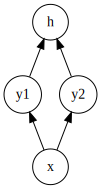

In [33]:
from graphviz import Digraph

dot = Digraph(comment='The Round Table')
dot.attr(rankdir='BT', size='8,5')
dot.attr('node', shape='circle')

dot.node('X', 'x')
dot.node('Y1', 'y1')
dot.node('Y2', 'y2')
dot.node('H', 'h')

dot.edge('X', 'Y1')
dot.edge('X', 'Y2')
dot.edge('Y1', 'H')
dot.edge('Y2', 'H')

dot

- 함수 $h(y_1, y_2)$가 위 처럼 정의되어있을때  $\mathbf{x}$에 대한 미분은 앞서 알아본 미분의 연쇄법칙에 의해 다음처럼 쓸 수 있다.

$$
\nabla h = \frac{\partial h}{\partial \mathbf{x}} =  \frac{\partial h}{\partial y_1}\frac{\partial y_1}{\partial \mathbf{x}} + \frac{\partial h}{\partial y_2}\frac{\partial y_2}{\partial \mathbf{x}} = \frac{\partial h}{\partial y_1}\nabla y_1 + \frac{\partial h}{\partial y_2}\nabla y_2
$$

- 위 그래프에서 $d$라는 변수는 $a$, $b$의 함수인데 $a$는 $x_1$, $x_2$의 함수이고, $b$는 $x_3$의 함수이다. 

- 따라서 $\mathbf{x}$에 대한 $d$의 미분은 위 식에 의해 다음과 같다.

$$
\nabla d = \frac{\partial d}{\partial a} \nabla a + \frac{\partial d}{\partial b}\nabla b
$$

- 양변에 $\mathbf{p}$를 내적하면

$$
\begin{align}
\nabla d \cdot \mathbf{p} 
&= \left(\frac{\partial d}{\partial a} \nabla a \right)\cdot \mathbf{p} + \left(\frac{\partial d}{\partial b}\nabla b\right)\cdot \mathbf{p} \\[5pt]
(\nabla d )^{\text{T}}\mathbf{p}  &= \frac{\partial d}{\partial a}(\nabla a )^{\text{T}}\mathbf{p} + \frac{\partial d}{\partial b}(\nabla b )^{\text{T}}\mathbf{p} 
\end{align}
$$

- 앞선 방향미분의 정의를 이용하면

$$
\begin{align}
(\nabla d )^{\text{T}}\mathbf{p}  &= \frac{\partial d}{\partial a}(\nabla a )^{\text{T}}\mathbf{p} + \frac{\partial d}{\partial b}(\nabla b )^{\text{T}}\mathbf{p} \\[5pt]
D_{\mathbf{p}}d &= \frac{\partial d}{\partial a} D_{\mathbf{p}} a + \frac{\partial d}{\partial b} D_{\mathbf{p}} b
\end{align}
$$

가 되어 앞선 변수들의 방향미분으로 어떤 중간변수의 방향미분을 구할수 있게 된다.

- 최초 독립변수 $x_1$, $x_2$, $x_3$에 대한 방향미분은

$$
D_{\mathbf{p}} x_1 = (\nabla x_1)^{\text{T}} \mathbf{p}= p_1 \\[5pt]
D_{\mathbf{p}} x_2 = (\nabla x_2)^{\text{T}} \mathbf{p}= p_2 \\[5pt]
D_{\mathbf{p}} x_3 = (\nabla x_3)^{\text{T}} \mathbf{p}= p_3
$$

- 우리가 구하고자 하는 것은 마지막 변수 $h$에 대한 특정 방향 $\mathbf{p}$으로 정의되는 미분계수이다.

- 이상 논의를 이용하면 그래프를 한번 포워드 패스하는 것으로 특정 방향 $\mathbf{p}$으로 정의되는 미분계수를 구할 수 있다.

- 따라서 각 변수에 대한 편도함수값을 구하기 위해서는 각 변수축 방향으로 $\mathbf{p}$를 설정하고 변수 개수만큼 포워드 패스하며 된다.

- 이상 논의를 이용한 위 함수에 대한 포워드 모드 자동 미분 코드는 아래와 같다.

In [34]:
def autodiff_forward_mode(x, p) :
    """
    자동 미분 포워드 모드 코드
    x : 미분을 계산하고자 하는 변수값
    p : x에서의 p방향으로의 방향미분을 구할 방향 p, seed vector
    """
    x1 = x[0]; x2 = x[1]; x3 = x[2];

    # 기본 변수 x1, x2, x3의 p방향으로의 방향미분은 p의 각 방향 성분이다.
    Dp_x1 = p[0]
    Dp_x2 = p[1]
    Dp_x3 = p[2]

    # 노드의 값        방향 미분값
    a = x1*x2;         Dp_a = x2*Dp_x1 + x1*Dp_x2; # 변수 a의 p방향으로의 방향미분
    b = np.sin(x3);    Dp_b = np.cos(x3)*Dp_x3;
    c = x1*x2;         Dp_c = x2*Dp_x1 + x1*Dp_x2;
    d = a*b;           Dp_d = b*Dp_a + a*Dp_b;
    e = np.exp(c);     Dp_e = np.exp(c)*Dp_c;
    f = d+e;           Dp_f = Dp_d + Dp_e;
    g = 1/x3;          Dp_g = -(1/(x3**2))*Dp_x3;
    h = f*g;           Dp_h = g*Dp_f + f*Dp_g;

    return Dp_h

# 모든 변수에 대한 미분값을 구하기 위해서는 총 변수 수 만큼 포워드 패스를 수행 해야 한다.
print("dx1={:f}, dx2={:f}, dx3={:f}".format(autodiff_forward_mode(x, np.array([1,0,0])),
                                            autodiff_forward_mode(x, np.array([0,1,0])),
                                            autodiff_forward_mode(x, np.array([0,0,1])) ) )

dx1=10.681278, dx2=5.340639, dx3=-3.805241


## 참고문헌

1. [sympy] Sympy, http://www.sympy.org/en/index.html

2. [wiki:deriv] Derivative#Notation_(details): https://en.wikipedia.org/wiki/Derivative

3. [paul] Paul's Online Math Notes, http://tutorial.math.lamar.edu/Classes/CalcI/DerivativeProofs.aspx

4. [thomas] Thomas' Calculus, Giordano, Weir, Finney, Pearson

5. [arora] Intoruduction to Optimum Design 2nd ed., Jasbir S. Arora, Elsevier

6. [cs231n:backprop] Backpropagation, Intuitions, CS231n: Convolutional Neural Networks for Visual Recognition, http://cs231n.github.io/optimization-2/

7. [nocedal] Numerical Optimization 2en ed.- Chap 8 Automatic Differentiation, Jorge Nocedal, Stephen J. Wright, Springer

8. [Géron] 핸즈온 머신러닝(Hands-On Machine Learning with Scikit-Learn and TensorFlow), Aurélien Géron, 한빛미디어(O'Reilly)

9. [wiki:direc_deriv] Directional derivative,  https://en.wikipedia.org/wiki/Directional_derivative


In [35]:
%%html
<link href='https://fonts.googleapis.com/earlyaccess/notosanskr.css' rel='stylesheet' type='text/css'>
<!--https://github.com/kattergil/NotoSerifKR-Web/stargazers-->
<link href='https://cdn.rawgit.com/kattergil/NotoSerifKR-Web/5e08423b/stylesheet/NotoSerif-Web.css' rel='stylesheet' type='text/css'>
<!--https://github.com/Joungkyun/font-d2coding-->
<link href="http://cdn.jsdelivr.net/gh/joungkyun/font-d2coding/d2coding.css" rel="stylesheet" type="text/css">
<style>
    h1     { font-family: 'Noto Sans KR' !important; color:#348ABD !important;   }
    h2     { font-family: 'Noto Sans KR' !important; color:#467821 !important;   }
    h3, h4 { font-family: 'Noto Sans KR' !important; color:#A60628 !important;   }
    p:not(.navbar-text) { font-family: 'Noto Serif KR', 'Nanum Myeongjo'; font-size: 12pt; line-height: 200%;  text-indent: 10px; }
    li:not(.dropdown):not(.p-TabBar-tab):not(.p-MenuBar-item):not(.jp-DirListing-item):not(.p-CommandPalette-header):not(.p-CommandPalette-item):not(.jp-RunningSessions-item)
            { font-family: 'Noto Serif KR', 'Nanum Myeongjo'; font-size: 12pt; line-height: 200%; }
    table  { font-family: 'Noto Sans KR' !important;  font-size: 11pt !important; }           
    li > p  { text-indent: 0px; }
    li > ul { margin-top: 0px !important; }       
    sup { font-family: 'Noto Sans KR'; font-size: 9pt; } 
    code, pre  { font-family: D2Coding, 'D2 coding' !important; font-size: 12pt !important; line-height: 130% !important;}
    .code-body { font-family: D2Coding, 'D2 coding' !important; font-size: 12pt !important;}
    .ns        { font-family: 'Noto Sans KR'; font-size: 15pt;}
    .summary   {
                   font-family: 'Georgia'; font-size: 12pt; line-height: 200%; 
                   border-left:3px solid #FF0000; 
                   padding-left:20px; 
                   margin-top:10px;
                   margin-left:15px;
               }
    .green { color:#467821 !important; }
    .comment { font-family: 'Noto Sans KR'; font-size: 10pt; }
</style>